<center><h2><b>2. Altitude of a satellite</b></h2></center>
<center><h4>Exercise 2.2 from Computational Physics by Mark Newman</h4></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">




<center><b><h3>Exercise 2.2: Altitude of a satellite</h3></b></center> 

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

**a)** Show that the altitude h above the Earth's surface that the satellite must have is
$$ h =\bigg(\frac{GMT^2}{4\pi^2}\bigg)^{1/3} - R$$

where $G = 6.67 x 10^{-11} m^3kg^{-1}s^{-2}$ is Newton's gravitational constant, $M = 5.97 x 10^{24} kg$ is the mass of the Earth, and $R = 6371 km$ is its radius.

**Answer:**

In [2]:
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString
from numpy import loadtxt
from pylab import imshow, show, jet, gray, hsv, bone, hot


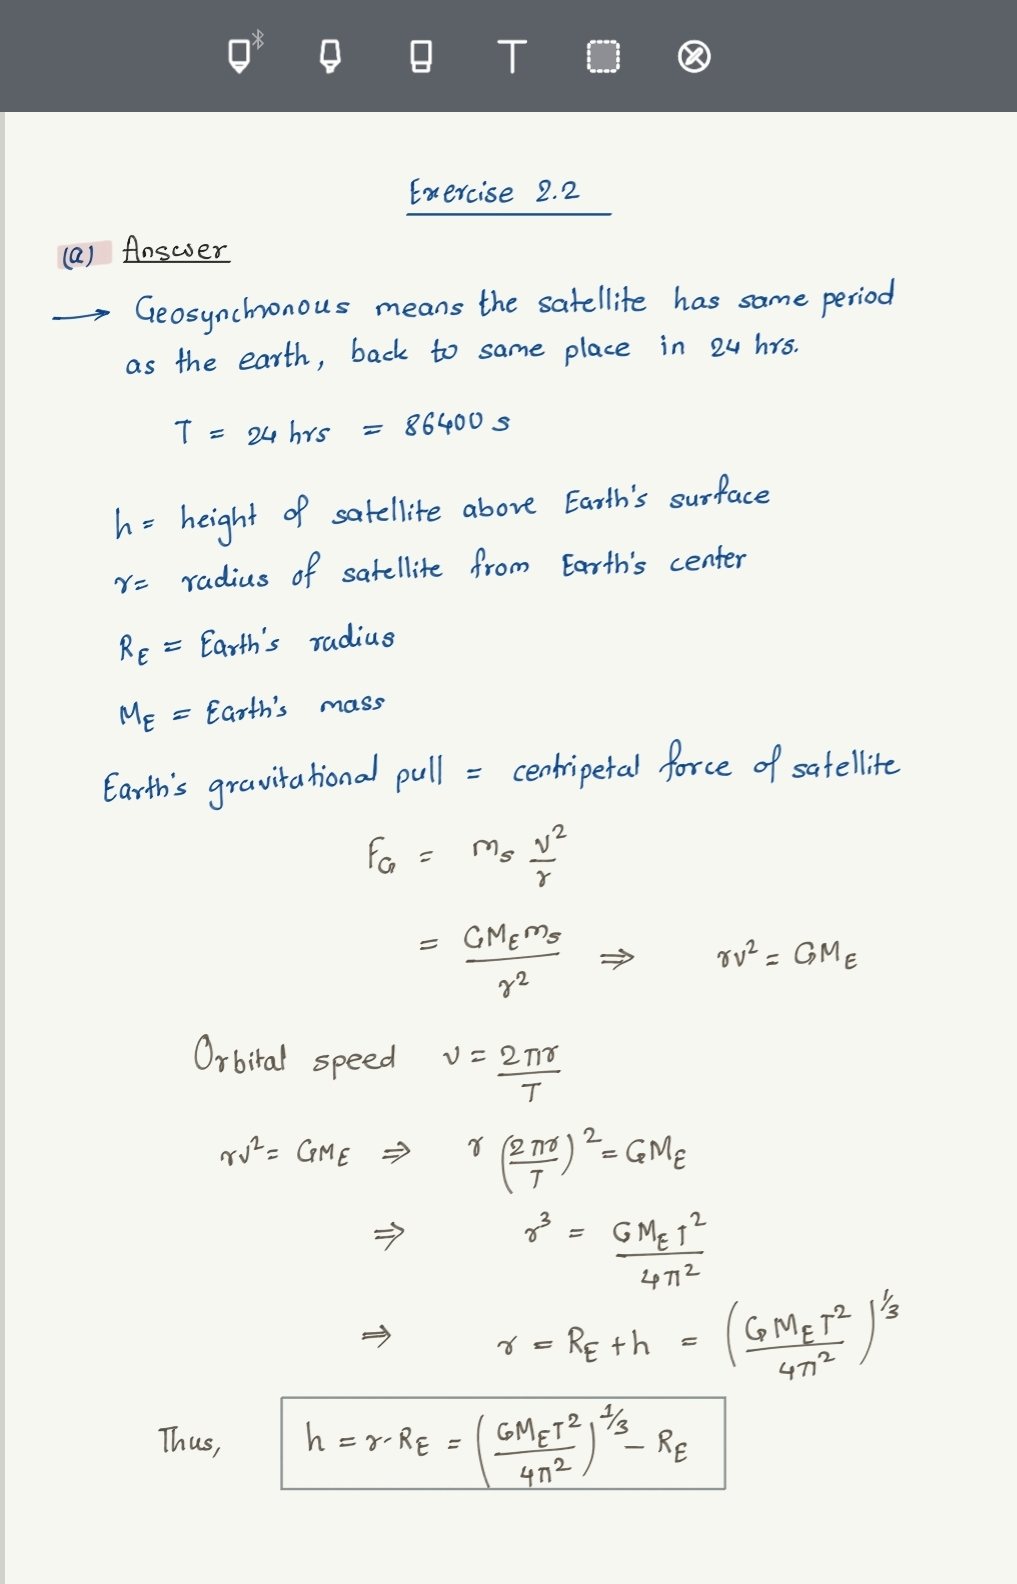

In [3]:
# Display image of written answer for (a)
Image(filename='ex2.2a.jpg', width=600)

<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr color="yellow"  width="100%" >

**b)** Write a program that asks the user to enter the desired value of T and then calcu-
lates and prints out the correct altitude in meters.

**Answer:**

In [4]:
G = 6.67*10**(-11) #Newton's gravitational constant in m^3kg^-1s^-2
M = 5.97*10**(24) #Earth's mass in kg
R = 6371 #Earth's radius in km


# Function takes time in minutes as an input and returns altitude in meters 
def height(T):
    T = T*60 # Convert minutes into seconds
    h = (G*M*T**2/(4*(math.pi**2)))**(1/3) - R*10**3 #(radius in meters and time in seconds)
    return h

T = float(input("Enter the orbital time in minutes: "))
print("\n\nSatellite orbits the planet once every",T,"minutes =",T*60,"seconds.")

print("\nSatellite must have the altitude of", height(T) ,"meters above Earth's surface.")

Enter the orbital time in minutes:  45




Satellite orbits the planet once every 45.0 minutes = 2700.0 seconds.

Satellite must have the altitude of -2181559.8978108233 meters above Earth's surface.


<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr color="yellow"  width="100%" >

**c)** Use your program to calculate the altitudes of satellites that orbit the Earth once a day (so-called "geosynchronous" orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

**Answer:**

In [5]:
# List for input orbital time
time = [1440, 90, 45]

# Printing output in tabular format
print ("{:<8} {:<15}".format('OrbitalTime(mins)','Altitute(m)')) # Print headers
print("\n")

# Calculate and print altitudes
for i in time:
    print ("{:<17} {:<15}".format(i,height(i)))

OrbitalTime(mins) Altitute(m)    


1440              35855910.17617497
90                279321.62537285965
45                -2181559.8978108233


**Conclusion:** From the above answers we can see that, the height of the satellite from the Earth's surface decrease with orbital time. As seen in the above results, we get negative value for altitude for the orbital time $= 45 mins$. It shows that the orbital time cannot be equal to or less than 45 mins. 

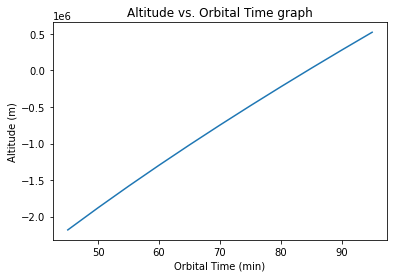

In [6]:
t = np.arange(45,100,5)
ht = np.array([height(time) for time in t])


plt.plot(t,height(t))
plt.xlabel('Orbital Time (min)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs. Orbital Time graph')
plt.show()

In [7]:
# Function to calculate corresponding x value given y value from the plot
print("\nFor altitude > 0.0 meters, the satellite should orbit earth more than once every",np.interp(0.0, ht, t), "minutes.\n\n")


For altitude > 0.0 meters, the satellite should orbit earth more than once every 84.39515515742524 minutes.




<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr color="yellow"  width="100%" >

**d)** Technically a geosynchronous satellite is one that orbits the Earth once per sidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

**Answer:**

**Sidereal day:** It's the amount of time time Earth takes to rotate $360^{\circ}$ with respect to a fixed perspective like far away stars. And the time is equal to 23 hours, 56 minutes and 4 seconds $= 23 + 56/60 + 4/60/60$ hours $=23.9 hours$. 


If we visualize an array presenting fixed location on Earth (like a sundial) and Earth is orbiting around the Sun, by the end of the day, the arrow will no longer be pointing towards the Sun since it has moved almost a degree around the sun so it must rotate an additional degree. So Earth has to continue rotationg for an additional 3 minutes, 56 seconds (dividing $360^{\circ}$ by number of minutes in a day) to align the arrow with radial vector to the Sun.  Thus, 23 hours, 56 minutes, 4 seconds + 3 mintues, 56 seconds = 24 hours.

**Solar day:** Earth takes 24 hours to rotate such that the Sun appears in the same spot in the sky, again.

     
So the geosynchornous satellites cares about being over a fixed point on Earth and it doesn't have anything to do with the apparent position of the Sun from the Earth's surface. Therefore, technically a geosynchronous satellite is one that orbits the Earth once per sidereal day, which is 23.93 hours, not 24 hours.

In [8]:
# Conversion of time into minutes
# 23 hours, 56 minutes and 4 seconds
actual_T = 23*60 + 56 + 4/60 # Uint = minutes

# 1 Day = 24 hrs = 24*60 mins 
day_T = 24*60 # Unit = minutes
print("\n ---> It makes difference of", height(day_T)-height(actual_T), "meters to the altitude of satellite.")


 ---> It makes difference of 76929.73074254394 meters to the altitude of satellite.
